## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [6]:
#convert to tidy format and drop 'total_litres_of_pure_alcohol'
tidy_df = pd.melt(df, id_vars=["country"], value_vars=["beer_servings", "wine_servings", "spirit_servings"],
                  var_name="drink", value_name="servings")

#drop the 'total_litres_of_pure_alcohol' column
tidy_df.drop(columns=['total_litres_of_pure_alcohol'], errors='ignore', inplace=True)
tidy_df

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,spirit_servings,100
575,Vietnam,spirit_servings,2
576,Yemen,spirit_servings,0
577,Zambia,spirit_servings,19


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

<ipython-input-12-3cbbec9355bf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='servings', y='country', data=top_beer, palette='Blues_d', hue=None)


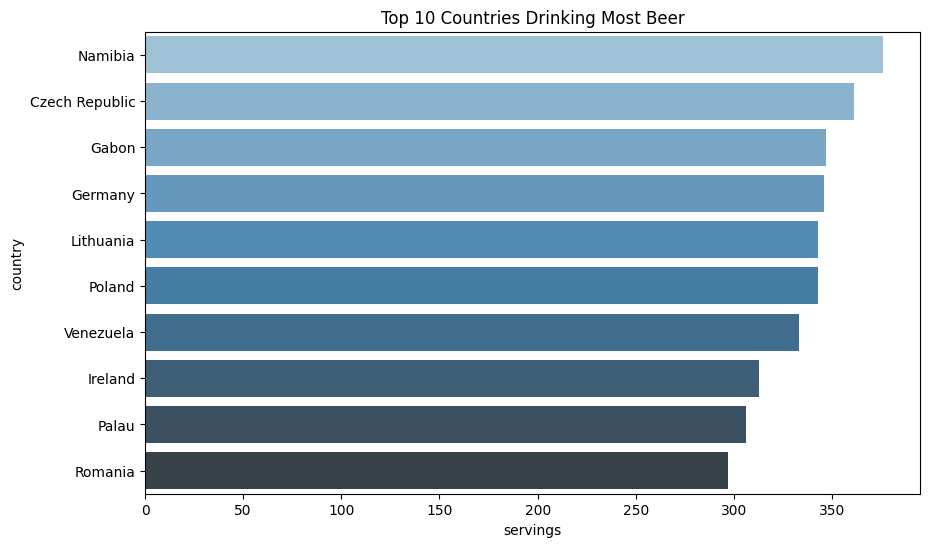

<ipython-input-12-3cbbec9355bf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='servings', y='country', data=top_wine, palette='Reds_d', hue=None)


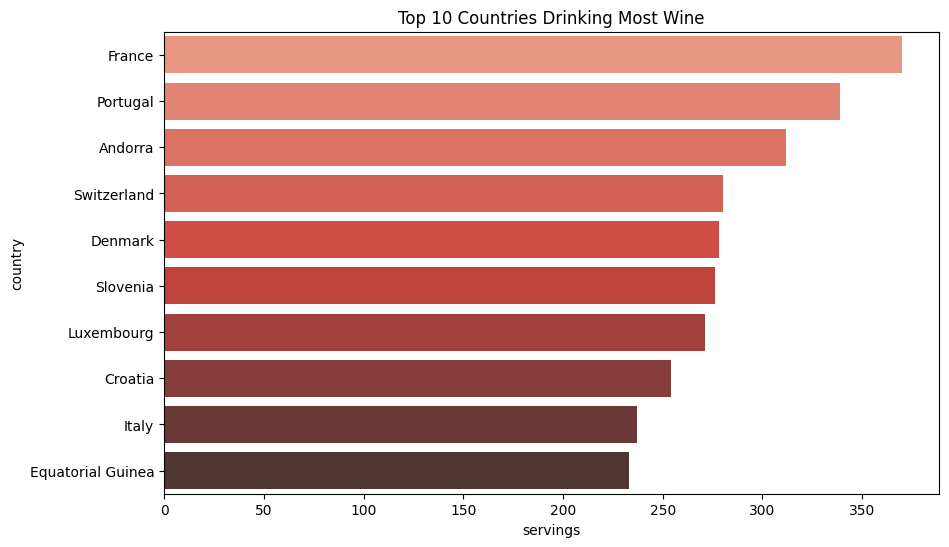

<ipython-input-12-3cbbec9355bf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='servings', y='country', data=top_spirits, palette='Greens_d', hue=None)


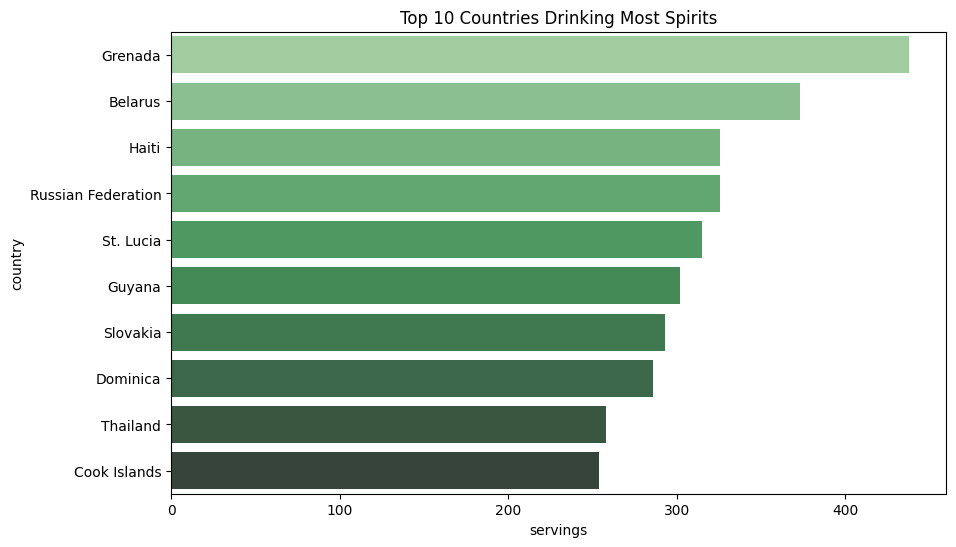

In [12]:
#remove "_servings" from 'drink' column
tidy_df['drink'] = tidy_df['drink'].str.replace('_servings', '')

#top countries for each drink type
top_beer = tidy_df[tidy_df['drink'] == 'beer'].nlargest(10, 'servings')
top_wine = tidy_df[tidy_df['drink'] == 'wine'].nlargest(10, 'servings')
top_spirits = tidy_df[tidy_df['drink'] == 'spirit'].nlargest(10, 'servings')

#top 10 countries for Beer
plt.figure(figsize=(10, 6))
sns.barplot(x='servings', y='country', data=top_beer, palette='Blues_d', hue=None)
plt.title('Top 10 Countries Drinking Most Beer')
plt.show()

#top 10 countries for Wine
plt.figure(figsize=(10, 6))
sns.barplot(x='servings', y='country', data=top_wine, palette='Reds_d', hue=None)
plt.title('Top 10 Countries Drinking Most Wine')
plt.show()

#top 10 countries for Spirits
plt.figure(figsize=(10, 6))
sns.barplot(x='servings', y='country', data=top_spirits, palette='Greens_d', hue=None)
plt.title('Top 10 Countries Drinking Most Spirits')
plt.show()

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [16]:
wide_df = tidy_df.pivot_table(index='country', columns='drink', values='servings', aggfunc='mean').reset_index()
wide_df

drink,country,beer,spirit,wine
0,Afghanistan,0.0,0.0,0.0
1,Albania,89.0,132.0,54.0
2,Algeria,25.0,0.0,14.0
3,Andorra,245.0,138.0,312.0
4,Angola,217.0,57.0,45.0
...,...,...,...,...
188,Venezuela,333.0,100.0,3.0
189,Vietnam,111.0,2.0,1.0
190,Yemen,6.0,0.0,0.0
191,Zambia,32.0,19.0,4.0
